<a href="https://colab.research.google.com/github/Sreelekha0409/Machine-Learning-and-Techniques/blob/main/Task%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset:
      Outlook Temperature Humidity    Wind PlayTennis
0      Sunny         Hot     High    Weak         No
1      Sunny         Hot     High  Strong         No
2   Overcast         Hot     High    Weak        Yes
3       Rain        Mild     High    Weak        Yes
4       Rain        Cool   Normal    Weak        Yes
5       Rain        Cool   Normal  Strong         No
6   Overcast        Cool   Normal  Strong        Yes
7      Sunny        Mild     High    Weak         No
8      Sunny        Cool   Normal    Weak        Yes
9       Rain        Mild   Normal    Weak        Yes
10     Sunny        Mild   Normal  Strong        Yes
11  Overcast        Mild     High  Strong        Yes
12  Overcast         Hot   Normal    Weak        Yes
13      Rain        Mild     High  Strong         No


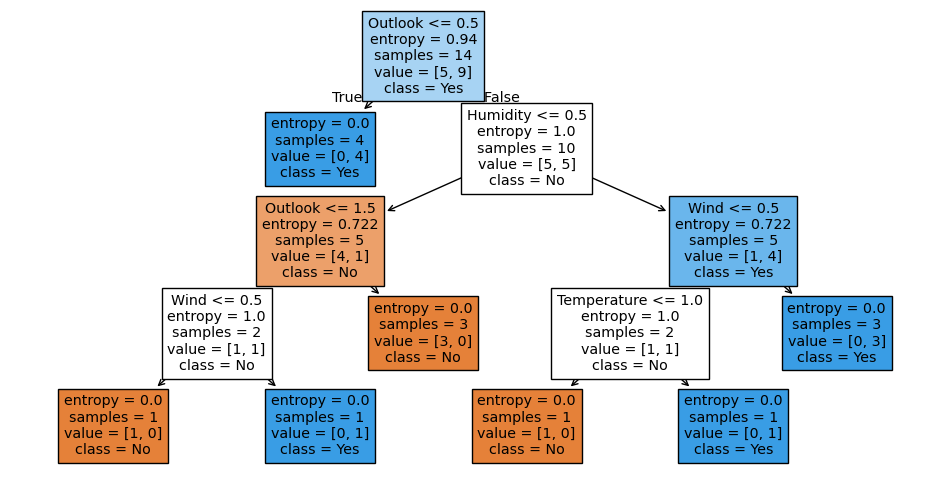


Decision Tree Rules:

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Wind <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Wind >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Temperature <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- Temperature >  1.00
|   |   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 1


New Sample: [['Sunny', 'Cool', 'High', 'Strong']]
Predicted Class (PlayTennis): ['No']


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt


data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast',
                'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                    'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
                 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong',
             'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
                   'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)
print("Dataset:\n", df)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

X = df_encoded.drop('PlayTennis', axis=1)
y = df_encoded['PlayTennis']

clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X, y)


plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=X.columns, class_names=['No','Yes'], filled=True)
plt.show()


tree_rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n")
print(tree_rules)


sample = pd.DataFrame({
    'Outlook': ['Sunny'],
    'Temperature': ['Cool'],
    'Humidity': ['High'],
    'Wind': ['Strong']
})


sample_encoded = sample.apply(lambda col: le.fit(df[col.name]).transform(col))
prediction = clf.predict(sample_encoded)

print("\nNew Sample:", sample.values.tolist())
print("Predicted Class (PlayTennis):", le.fit(df['PlayTennis']).inverse_transform(prediction))